<a href="https://colab.research.google.com/github/tainguyen30/AI-2022-2023/blob/main/Cook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=97f168f346e931538b87fe2e773198f6130a5e8b3c83d2b34c31a2b3a1b9b413
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


63.333333333333336


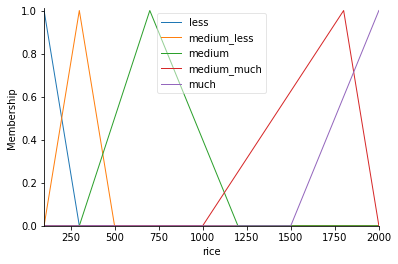

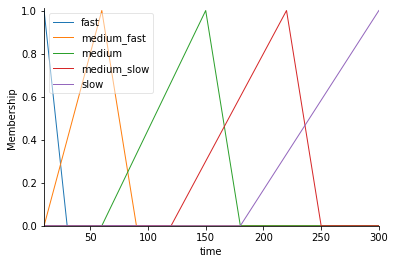

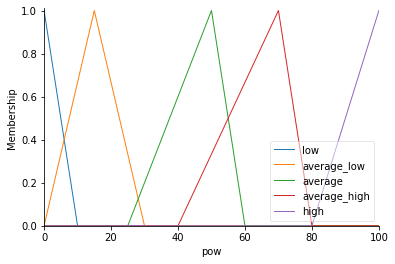

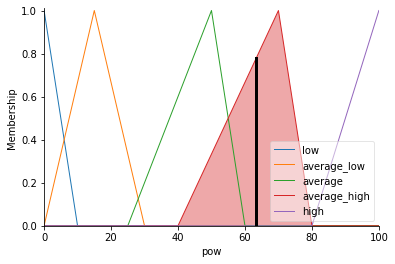

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

rice =ctrl.Antecedent(np.arange(100,2010,10),'rice')
time =ctrl.Antecedent(np.arange(10,301,1),'time')
pow = ctrl.Consequent(np.arange(0,101,1),'pow')

rice['less'] = fuzz.trimf(rice.universe,[100,100,300])
rice['medium_less'] = fuzz.trimf(rice.universe,[100,300,500])
rice['medium'] = fuzz.trimf(rice.universe,[300,700,1200])
rice['medium_much'] = fuzz.trimf(rice.universe,[1000,1800,2000])
rice['much'] = fuzz.trimf(rice.universe,[1500,2000,2000])

time['fast'] = fuzz.trimf(time.universe,[10,10,30])
time['medium_fast'] = fuzz.trimf(time.universe,[10,60,90])
time['medium'] = fuzz.trimf(time.universe,[60,150,180])
time['medium_slow'] = fuzz.trimf(time.universe,[120,220,250])
time['slow'] = fuzz.trimf(time.universe,[180,300,300])

pow['low'] = fuzz.trimf(pow.universe,[0,0,10])
pow['average_low'] = fuzz.trimf(pow.universe,[0,15,30])
pow['average'] = fuzz.trimf(pow.universe,[25,50,60])
pow['average_high'] = fuzz.trimf(pow.universe,[40,70,80])
pow['high'] = fuzz.trimf(pow.universe,[80,100,100])

rule1 = ctrl.Rule(rice['less']&time['fast'],pow['average'])
rule2 = ctrl.Rule(rice['less']&time['medium_fast'],pow['average'])
rule3 = ctrl.Rule(rice['less']&time['medium'],pow['average_low'])
rule4 = ctrl.Rule(rice['less']&time['medium_slow'],pow['low'])
rule5 = ctrl.Rule(rice['less']&time['slow'],pow['low'])
rule6 = ctrl.Rule(rice['medium_less']&time['fast'],pow['average_high'])
rule7 = ctrl.Rule(rice['medium_less']&time['medium_fast'],pow['average'])
rule8 = ctrl.Rule(rice['medium_less']&time['medium'],pow['average'])
rule9 = ctrl.Rule(rice['medium_less']&time['medium_slow'],pow['average_low'])
rule10 = ctrl.Rule(rice['medium_less']&time['slow'],pow['low'])
rule11 = ctrl.Rule(rice['medium']&time['fast'],pow['average_high'])
rule12 = ctrl.Rule(rice['medium']&time['medium_fast'],pow['average_high'])
rule13 = ctrl.Rule(rice['medium']&time['medium'],pow['average_high'])
rule14 = ctrl.Rule(rice['medium']&time['medium_slow'],pow['average'])
rule15 = ctrl.Rule(rice['medium']&time['slow'],pow['average_low'])
rule16 = ctrl.Rule(rice['medium_much']&time['fast'],pow['high'])
rule17 = ctrl.Rule(rice['medium_much']&time['medium_fast'],pow['high'])
rule18 = ctrl.Rule(rice['medium_much']&time['medium'],pow['average_high'])
rule19 = ctrl.Rule(rice['medium_much']&time['medium_slow'],pow['average_high'])
rule20 = ctrl.Rule(rice['medium_much']&time['slow'],pow['average'])
rule21 = ctrl.Rule(rice['much']&time['fast'],pow['high'])
rule22 = ctrl.Rule(rice['much']&time['medium_fast'],pow['high'])
rule23 = ctrl.Rule(rice['much']&time['medium'],pow['high'])
rule24 = ctrl.Rule(rice['much']&time['medium_slow'],pow['average_high'])
rule25 = ctrl.Rule(rice['much']&time['slow'],pow['average_high'])

power_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,
                                   rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,
                                   rule23,rule24,rule25])
power = ctrl.ControlSystemSimulation(power_ctrl)
power.input['rice'] = 2000
power.input['time'] = 300
power.compute() #tính toán

rice.view()
time.view()
pow.view()
print(power.output['pow'])
pow.view(sim = power)